In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
def clean_text(text: str) -> str:
    # 2) remove any occurrences of "x92"
    text = re.sub(r'\x92', "'", text)
    # 1) replace any punctuation (i.e. non-word, non-space) with a space
    text = re.sub(r'[^\w\s]', '', text)
    # 3) lowercase everything
    text = text.lower()
    # 4) collapse multiple whitespace into one, and strip ends
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [3]:
datapath = '/Users/sidsatya/dev/ailabor/task_classification/data/classified_tasks_felten.csv'
data = pd.read_csv(datapath)
data['task_clean'] = data['Task'].apply(clean_text)
data

,Task,gpt_label,sample_num,task_clean
0,Resolve customer complaints regarding sales an...,"{\n 1: 'No',\n 2: 'No',\n 3: 'No',\n 4: 'N...",2,resolve customer complaints regarding sales an...
1,Resolve customer complaints regarding sales an...,"{\n 1: 'No',\n 2: 'No',\n 3: 'No',\n 4: 'N...",1,resolve customer complaints regarding sales an...
2,Resolve customer complaints regarding sales an...,"{\n 1: 'No',\n 2: 'No',\n 3: 'No',\n 4: 'N...",0,resolve customer complaints regarding sales an...
3,Monitor customer preferences to determine focu...,"{\n 1: 'No',\n 2: 'No',\n 3: 'No',\n 4: 'N...",0,monitor customer preferences to determine focu...
4,Monitor customer preferences to determine focu...,"{\n 1: 'No',\n 2: 'No',\n 3: 'No',\n 4: 'N...",1,monitor customer preferences to determine focu...
...,...,...,...,...
78051,"Fit garments on clients, altering as needed.","{1:'No',2:'No',3:'No',4:'No',5:'Yes',6:'No',7:...",0,fit garments on clients altering as needed
78052,"Fit garments on clients, altering as needed.","{\n 1: 'No',\n 2: 'No',\n 3: 'No',\n 4: 'N...",2,fit garments on clients altering as needed
78053,"Assist passengers, such as elderly or individu...","{\n 1: 'No',\n 2: 'No',\n 3: 'No',\n 4: 'N...",2,assist passengers such as elderly or individua...
78054,"Assist passengers, such as elderly or individu...","{\n 1: 'No',\n 2: 'No',\n 3: 'No',\n 4: 'N...",0,assist passengers such as elderly or individua...


In [ ]:
def read_gpt_label(label):
    # label is formatted as a JSON string with 10 key-value pairs
    label = label.replace("'", '"')  # Replace single quotes with double quotes
    label = label.replace('nan', 'null')  # Replace 'nan' with 'null' for JSON compatibility
    try:
        label_dict = eval(label)  # Use eval to convert the string to a dictionary
        return label_dict
    except Exception as e:
        if e != 'gpt_label':
            print(f"Error parsing label: {e}")
        return {}


data['read_label'] = data['gpt_label'].apply(read_gpt_label)
data['abstract_strategy_games'] = data['read_label'].apply(lambda x: 1 if x.get(1, 'No') == 'Yes' else 0)
data['real_time_video_games'] = data['read_label'].apply(lambda x: 1 if x.get(2, 'No') == 'Yes' else 0)
data['image_recognition'] = data['read_label'].apply(lambda x: 1 if x.get(3, 'No') == 'Yes' else 0)
data['visual_qa'] = data['read_label'].apply(lambda x: 1 if x.get(4, 'No') == 'Yes' else 0)
data['image_generation'] = data['read_label'].apply(lambda x: 1 if x.get(5, 'No') == 'Yes' else 0)
data['reading_comprehension'] = data['read_label'].apply(lambda x: 1 if x.get(6, 'No') == 'Yes' else 0)
data['language_modeling'] = data['read_label'].apply(lambda x: 1 if x.get(7, 'No') == 'Yes' else 0)
data['translation'] = data['read_label'].apply(lambda x: 1 if x.get(8, 'No') == 'Yes' else 0)
data['speech_recognition'] = data['read_label'].apply(lambda x: 1 if x.get(9, 'No') == 'Yes' else 0)
data['instrumental_track_recognition'] = data['read_label'].apply(lambda x: 1 if x.get(10, 'No') == 'Yes' else 0)

Error parsing label: name 'gpt_label' is not defined
Error parsing label: name 'gpt_label' is not defined
Error parsing label: name 'gpt_label' is not defined
Error parsing label: name 'gpt_label' is not defined
Error parsing label: name 'gpt_label' is not defined


In [ ]:
# Group by Task and compute mode and mean for each category
grouped_data = data.groupby('task_clean').agg({
    'abstract_strategy_games': ['mean', lambda x: x.mode()[0] if not x.mode().empty else 0],
    'real_time_video_games': ['mean', lambda x: x.mode()[0] if not x.mode().empty else 0],
    'image_recognition': ['mean', lambda x: x.mode()[0] if not x.mode().empty else 0],
    'visual_qa': ['mean', lambda x: x.mode()[0] if not x.mode().empty else 0],
    'image_generation': ['mean', lambda x: x.mode()[0] if not x.mode().empty else 0],
    'reading_comprehension': ['mean', lambda x: x.mode()[0] if not x.mode().empty else 0],
    'language_modeling': ['mean', lambda x: x.mode()[0] if not x.mode().empty else 0],
    'translation': ['mean', lambda x: x.mode()[0] if not x.mode().empty else 0],
    'speech_recognition': ['mean', lambda x: x.mode()[0] if not x.mode().empty else 0],
    'instrumental_track_recognition': ['mean', lambda x: x.mode()[0] if not x.mode().empty else 0]
}).reset_index()

# collapse the multi-level columns into dimension_mean and dimension_mode
grouped_data.columns = ['Task', 'abstract_strategy_games_mean', 'abstract_strategy_games_mode',
                        'real_time_video_games_mean', 'real_time_video_games_mode',
                        'image_recognition_mean', 'image_recognition_mode',
                        'visual_qa_mean', 'visual_qa_mode',
                        'image_generation_mean', 'image_generation_mode',
                        'reading_comprehension_mean', 'reading_comprehension_mode',
                        'language_modeling_mean', 'language_modeling_mode',
                        'translation_mean', 'translation_mode',
                        'speech_recognition_mean', 'speech_recognition_mode',
                        'instrumental_track_recognition_mean', 'instrumental_track_recognition_mode']

print(grouped_data.shape)
grouped_data

(22273, 21)


,Task,abstract_strategy_games_mean,abstract_strategy_games_mode,real_time_video_games_mean,real_time_video_games_mode,image_recognition_mean,image_recognition_mode,visual_qa_mean,visual_qa_mode,image_generation_mean,...,reading_comprehension_mean,reading_comprehension_mode,language_modeling_mean,language_modeling_mode,translation_mean,translation_mode,speech_recognition_mean,speech_recognition_mode,instrumental_track_recognition_mean,instrumental_track_recognition_mode
0,accept and check containers of mail or parcels...,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,...,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0
1,accept and implement energy schedules includin...,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,...,1.0,1,1.0,1,1.0,1,0.0,0,0.0,0
2,accept commissions to create music for special...,0.0,0,0.0,0,0.000000,0,0.0,0,1.0,...,0.0,0,0.0,0,0.0,0,0.0,0,1.0,1
3,accept orders from customers calculate and quo...,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,...,1.0,1,1.0,1,1.0,1,0.0,0,0.0,0
4,accept payment from customers and make change ...,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,...,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22268,writes reports on sales and products,0.0,0,0.0,0,0.333333,0,0.0,0,0.0,...,1.0,1,1.0,1,1.0,1,0.0,0,0.0,0
22269,writes specifications on tracing paper to prov...,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,...,1.0,1,1.0,1,1.0,1,0.0,0,0.0,0
22270,writes specifications to order custommade surg...,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,...,1.0,1,1.0,1,0.0,0,0.0,0,0.0,0
22271,writes words to fit musical compositions inclu...,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,...,1.0,1,1.0,1,1.0,1,0.0,0,0.0,0


In [36]:
# Find all rows where the mean of any dimension_mean column is not equal to the mode of the corresponding dimension_mode column
filtered_tasks = grouped_data[(grouped_data['abstract_strategy_games_mean'] != grouped_data['abstract_strategy_games_mode']) | 
                                (grouped_data['real_time_video_games_mean'] != grouped_data['real_time_video_games_mode']) |
                                (grouped_data['image_recognition_mean'] != grouped_data['image_recognition_mode']) |
                                (grouped_data['visual_qa_mean'] != grouped_data['visual_qa_mode']) |
                                (grouped_data['image_generation_mean'] != grouped_data['image_generation_mode']) |
                                (grouped_data['reading_comprehension_mean'] != grouped_data['reading_comprehension_mode']) |
                                (grouped_data['language_modeling_mean'] != grouped_data['language_modeling_mode']) |
                                (grouped_data['translation_mean'] != grouped_data['translation_mode']) |
                                (grouped_data['speech_recognition_mean'] != grouped_data['speech_recognition_mode']) |
                                (grouped_data['instrumental_track_recognition_mean'] != grouped_data['instrumental_track_recognition_mode'])]
filtered_tasks.shape

(6815, 21)

In [37]:
print(f"GPT agreed across multiple (>= 3) samples unanimously on all but {7023/23839:.2%} of tasks".format(len(filtered_tasks), len(data)))

GPT agreed across multiple (>= 3) samples unanimously on all but 29.46% of tasks


In [148]:
# Load in the AI progress metrics 
ai_progress_dir = '/Users/sidsatya/dev/ailabor/ai_progress_metrics/data'
year_dim_avg_slopes = pd.read_csv(f'{ai_progress_dir}/year_dim_avg_slopes.csv')
year_dim_avg_slopes = year_dim_avg_slopes.rename(columns={'Unnamed: 0': 'year'})
overall_slopes = pd.read_csv(f'{ai_progress_dir}/overall_slopes.csv')

In [149]:
overall_slopes_T = overall_slopes.T.reset_index().drop(columns=['index'])
overall_slopes_T.columns = [x + " Overall Slope" for x in overall_slopes_T.iloc[0]]
overall_slopes_T = overall_slopes_T[1:]

year_dim_avg_slopes.set_index('year', inplace=True)
year_dim_avg_slopes.columns = [x + " Year Slope" for x in year_dim_avg_slopes.columns]
year_dim_avg_slopes.reset_index(inplace=True)
year_dim_avg_slopes['prog_year'] = pd.to_datetime(year_dim_avg_slopes['year']).dt.year

year_dim_avg_slopes['Image Recognition Cum Slope'] = year_dim_avg_slopes['Image Recognition Year Slope'].cumsum()
year_dim_avg_slopes['Visual QA Cum Slope'] = year_dim_avg_slopes['Visual QA Year Slope'].cumsum()
year_dim_avg_slopes['Image Generation Cum Slope'] = year_dim_avg_slopes['Image Generation Year Slope'].cumsum()
year_dim_avg_slopes['Reading Comprehension Cum Slope'] = year_dim_avg_slopes['Reading Comprehension Year Slope'].cumsum()
year_dim_avg_slopes['Language Modeling Cum Slope'] = year_dim_avg_slopes['Language Modeling Year Slope'].cumsum()
year_dim_avg_slopes['Translation Cum Slope'] = year_dim_avg_slopes['Translation Year Slope'].cumsum()
year_dim_avg_slopes['Speech Recognition Cum Slope'] = year_dim_avg_slopes['Speech Recognition Year Slope'].cumsum()
year_dim_avg_slopes['Instrumental Track Recognition Cum Slope'] = year_dim_avg_slopes['Instrumental Track Recognition Year Slope'].cumsum()
year_dim_avg_slopes['Real-Time Video Games Cum Slope'] = year_dim_avg_slopes['Real-Time Video Games Year Slope'].cumsum()
year_dim_avg_slopes['Abstract Strategy Games Cum Slope'] = year_dim_avg_slopes['Abstract Strategy Games Year Slope'].cumsum()


In [150]:
year_dim_avg_slopes.head()

,year,Image Recognition Year Slope,Speech Recognition Year Slope,Abstract Strategy Games Year Slope,Language Modeling Year Slope,Reading Comprehension Year Slope,Real-Time Video Games Year Slope,Instrumental Track Recognition Year Slope,Image Generation Year Slope,Translation Year Slope,...,Image Recognition Cum Slope,Visual QA Cum Slope,Image Generation Cum Slope,Reading Comprehension Cum Slope,Language Modeling Cum Slope,Translation Cum Slope,Speech Recognition Cum Slope,Instrumental Track Recognition Cum Slope,Real-Time Video Games Cum Slope,Abstract Strategy Games Cum Slope
0,1985-01-01,0.0,0.0,0.113482,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.113482
1,1986-01-01,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.113482
2,1987-01-01,0.0,0.0,0.051211,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.164693
3,1988-01-01,0.0,0.0,0.035755,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.200448
4,1989-01-01,0.0,0.0,0.016916,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217364


In [151]:
# Merge with the overall task dataset 
all_task_datapath = '/Users/sidsatya/dev/ailabor/onet_transformations/output_data/task_statements_harmonized_with_attributes.csv'
all_task_data = pd.read_csv(all_task_datapath)
all_task_data['task_clean'] = all_task_data['Task'].apply(clean_text)

# Merge all_data with grouped data on 'Task'
merged_data = pd.merge(all_task_data, grouped_data, left_on='task_clean', right_on = 'Task', how='left')

# Merge with the year_dim_avg_slopes data on year
merged_data = pd.merge(merged_data, year_dim_avg_slopes, left_on='ONET_release_year', right_on='prog_year', how='left')

# Horizontally stack overall slopes to merged data
# Repeat overall_slopes_T for the number of rows in merged_data
overall_slopes_repeated = pd.concat([overall_slopes_T] * len(merged_data), ignore_index=True)

# Concatenate the repeated overall_slopes_T with merged_data
merged_data = pd.concat([merged_data.reset_index(drop=True), overall_slopes_repeated], axis=1)

In [152]:
# Drop any rows with NaN values in the 'reading_comprehension_mean' column
merged_data = merged_data.dropna(subset=['reading_comprehension_mean'])
print(merged_data.shape, merged_data.columns)

(348166, 80) Index(['O*NET-SOC Code', 'O*NET 2010 SOC Code', 'O*NET 2018 SOC Code',
       'ONET_release_year', 'Task ID', 'Task_x', 'Task Type',
       'Incumbents Responding', 'Date', 'Domain Source', 'Count', 'task_clean',
       'canon_id', 'year_x', 'Mean Importance', 'Importance Normalized All',
       'Mean Frequency', 'normalized_importance', 'normalized_importance_core',
       'normalized_frequency', 'normalized_frequency_core', 'task_intensity',
       'task_intensity_core', 'first_seen', 'last_seen', 'Task_y',
       'abstract_strategy_games_mean', 'abstract_strategy_games_mode',
       'real_time_video_games_mean', 'real_time_video_games_mode',
       'image_recognition_mean', 'image_recognition_mode', 'visual_qa_mean',
       'visual_qa_mode', 'image_generation_mean', 'image_generation_mode',
       'reading_comprehension_mean', 'reading_comprehension_mode',
       'language_modeling_mean', 'language_modeling_mode', 'translation_mean',
       'translation_mode', 'speech_r

In [154]:
merged_data[['O*NET 2018 SOC Code', 'ONET_release_year', 'Image Generation Overall Slope', 'Image Generation Year Slope', 'Image Generation Cum Slope']]

,O*NET 2018 SOC Code,ONET_release_year,Image Generation Overall Slope,Image Generation Year Slope,Image Generation Cum Slope
0,11-1011,2003,0.348742,0.000000,0.00000
1,11-1011,2003,0.348742,0.000000,0.00000
2,11-1011,2003,0.348742,0.000000,0.00000
3,11-1011,2003,0.348742,0.000000,0.00000
4,11-1011,2003,0.348742,0.000000,0.00000
...,...,...,...,...,...
453264,53-7081,2025,0.348742,0.131907,3.21257
453265,53-7081,2025,0.348742,0.131907,3.21257
453266,53-7081,2025,0.348742,0.131907,3.21257
453267,53-7081,2025,0.348742,0.131907,3.21257


In [155]:
# ------------------------------------------------------------------
# §1  Fill missing task-intensity columns (fixes the typo as well)
# ------------------------------------------------------------------
merged_data['task_intensity']      = merged_data['task_intensity'].fillna(0)
merged_data['task_intensity_core'] = merged_data['task_intensity_core'].fillna(0)

# ------------------------------------------------------------------
# §2  Create weighted-exposure columns for each Felten dimension
# ------------------------------------------------------------------
#  dictionary:  task-flag prefix  →  column holding the (overall OR yearly) slope
felten_dims = {
    'abstract_strategy_games'        : 'Abstract Strategy Games Cum Slope',
    'real_time_video_games'          : 'Real-Time Video Games Cum Slope',
    'image_recognition'              : 'Image Recognition Cum Slope',
    'visual_qa'                      : 'Visual QA Cum Slope',
    'image_generation'               : 'Image Generation Cum Slope',
    'reading_comprehension'          : 'Reading Comprehension Cum Slope',
    'language_modeling'              : 'Language Modeling Cum Slope',
    'translation'                    : 'Translation Cum Slope',
    'speech_recognition'             : 'Speech Recognition Cum Slope',
    'instrumental_track_recognition' : 'Instrumental Track Recognition Cum Slope'
}

for dim, slope_col in felten_dims.items():
    # all tasks
    merged_data[f'weighted_{dim}'] = (
        merged_data[f'{dim}_mode'] *
        merged_data['task_intensity'] *
        merged_data[slope_col]
    )
    # core tasks only
    merged_data[f'weighted_{dim}_core'] = (
        merged_data[f'{dim}_mode'] *
        merged_data['task_intensity_core'] *
        merged_data[slope_col]
    )

# ------------------------------------------------------------------
# §3  Collapse to an occupation-by-year exposure panel
# ------------------------------------------------------------------
collapse_cols = [c for c in merged_data.columns if c.startswith('weighted_')]

occ_year = (
    merged_data
    .groupby(['O*NET 2018 SOC Code', 'ONET_release_year'])[collapse_cols]
    .sum()
    .reset_index()
)

# overall exposure indices (all tasks vs. core tasks)
weight_cols_all  = [c for c in collapse_cols if not c.endswith('_core')]
weight_cols_core = [c for c in collapse_cols if c.endswith('_core')]

occ_year['exposure_all']  = occ_year[weight_cols_all ].sum(axis=1)
occ_year['exposure_core'] = occ_year[weight_cols_core].sum(axis=1)

# ------------------------------------------------------------------
# Result: `occ_year` has one row per (occupation, year) with:
#         - exposure_all  : shift–share index using *all* tasks
#         - exposure_core : shift–share index using only “core” tasks
# ------------------------------------------------------------------


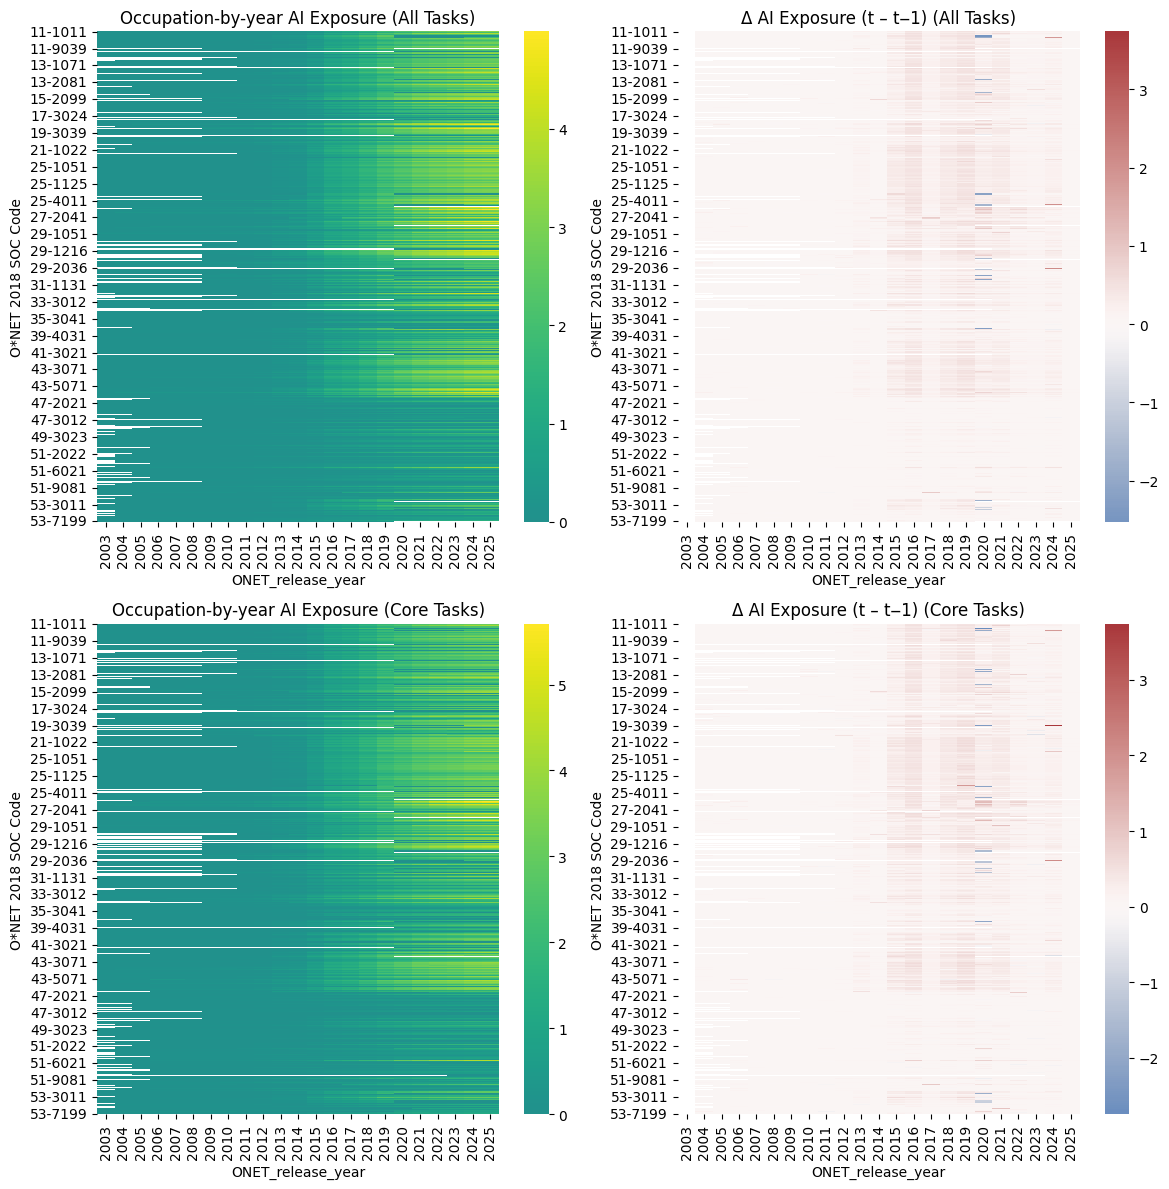

In [180]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Heatmap for cumulative exposure (all tasks)
pivot = occ_year.pivot(index='O*NET 2018 SOC Code',
             columns='ONET_release_year',
             values='exposure_all')
pivot = pivot.apply(pd.to_numeric, errors='coerce')
sns.heatmap(pivot, cmap='viridis', center=0, ax=axes[0, 0])
axes[0, 0].set_title('Occupation-by-year AI Exposure (All Tasks)')

# Heatmap for delta exposure (all tasks)
delta = pivot.diff(axis=1)
sns.heatmap(delta, cmap='vlag', center=0, ax=axes[0, 1])
axes[0, 1].set_title('Δ AI Exposure (t – t‒1) (All Tasks)')

# Heatmap for cumulative exposure (core tasks)
pivot = occ_year.pivot(index='O*NET 2018 SOC Code',
             columns='ONET_release_year',
             values='exposure_core')
pivot = pivot.apply(pd.to_numeric, errors='coerce')
sns.heatmap(pivot, cmap='viridis', center=0, ax=axes[1, 0])
axes[1, 0].set_title('Occupation-by-year AI Exposure (Core Tasks)')

# Heatmap for delta exposure (core tasks)
delta = pivot.diff(axis=1)
sns.heatmap(delta, cmap='vlag', center=0, ax=axes[1, 1])
axes[1, 1].set_title('Δ AI Exposure (t – t‒1) (Core Tasks)')

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('/Users/sidsatya/dev/ailabor/ai_progress_metrics/figs/ai_exposure_figs/occupation_by_year_exposure_cum_2x2.png', dpi=300)
plt.show()


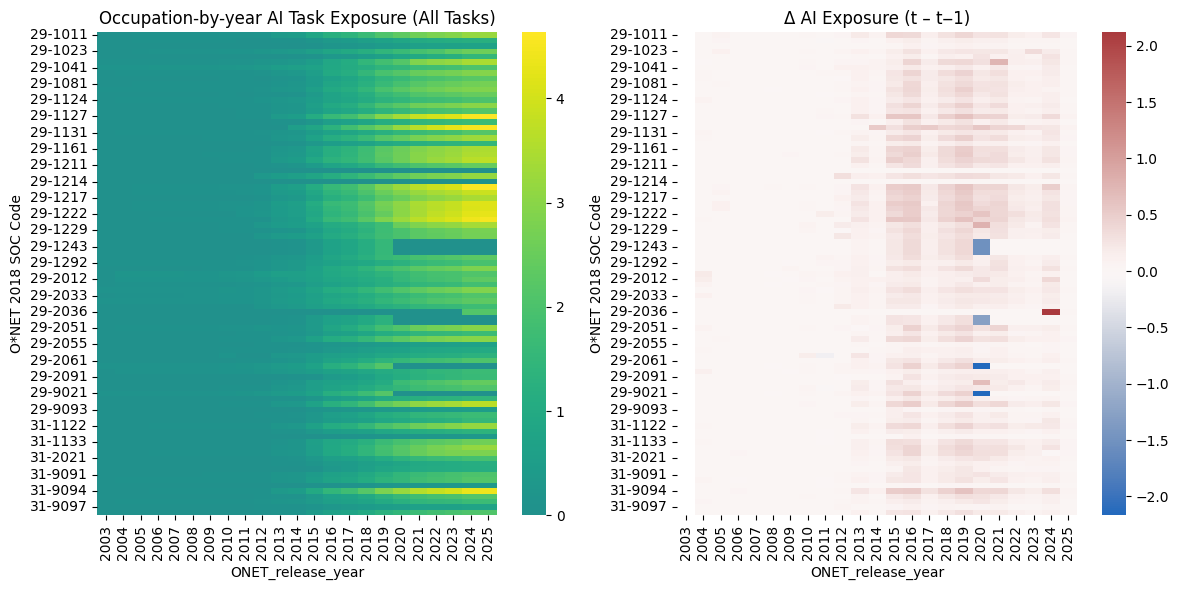

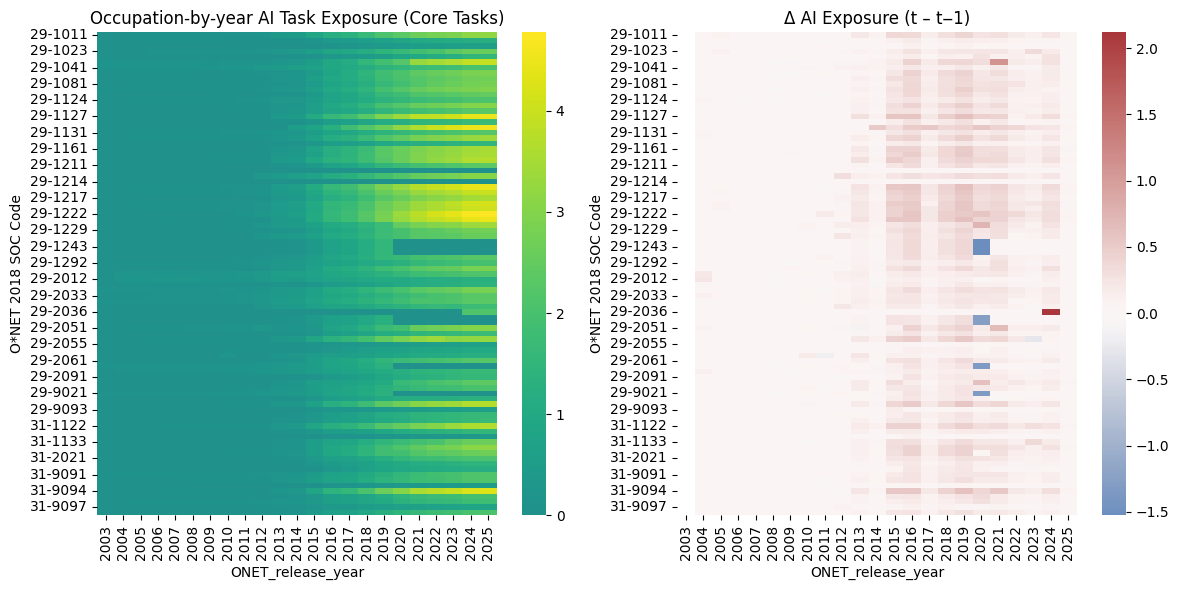

In [190]:
# Filter healthcare-related occupations
occ_year_healthcare = occ_year[
    (occ_year['O*NET 2018 SOC Code'].str.startswith('31')) | 
    (occ_year['O*NET 2018 SOC Code'].str.startswith('29'))
]

# Pivot for cumulative exposure (all tasks)
pivot_all = occ_year_healthcare.pivot(index='O*NET 2018 SOC Code',
                                      columns='ONET_release_year',
                                      values='exposure_all')
pivot_all.fillna(0, inplace=True)  # Fill NaN values with 0
pivot_all = pivot_all.apply(pd.to_numeric, errors='coerce')  # Ensure numeric data
pivot_all.sort_index(inplace=True)

# Calculate year-over-year delta
delta_all = pivot_all.diff(axis=1)

# Plot cumulative and delta exposure (all tasks)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(pivot_all, cmap='viridis', center=0, ax=axes[0])
axes[0].set_title('Occupation-by-year AI Task Exposure (All Tasks)')
sns.heatmap(delta_all, cmap='vlag', center=0, ax=axes[1])
axes[1].set_title('Δ AI Exposure (t – t‒1)')
plt.tight_layout()
plt.savefig('/Users/sidsatya/dev/ailabor/ai_progress_metrics/figs/ai_exposure_figs/healthcare_exposure_all_tasks_cum.png', dpi=300)
plt.show()

# Pivot for cumulative exposure (core tasks)
pivot_core = occ_year_healthcare.pivot(index='O*NET 2018 SOC Code',
                                       columns='ONET_release_year',
                                       values='exposure_core')
pivot_core.fillna(0, inplace=True)  # Fill NaN values with 0
pivot_core = pivot_core.apply(pd.to_numeric, errors='coerce')  # Ensure numeric data
pivot_core.sort_index(inplace=True)

# Calculate year-over-year delta
delta_core = pivot_core.diff(axis=1)

# Plot cumulative and delta exposure (core tasks)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(pivot_core, cmap='viridis', center=0, ax=axes[0])
axes[0].set_title('Occupation-by-year AI Task Exposure (Core Tasks)')
sns.heatmap(delta_core, cmap='vlag', center=0, ax=axes[1])
axes[1].set_title('Δ AI Exposure (t – t‒1)')
plt.tight_layout()
plt.savefig('/Users/sidsatya/dev/ailabor/ai_progress_metrics/figs/ai_exposure_figs/healthcare_exposure_core_tasks_cum.png', dpi=300)
plt.show()


## Investigate Changes in Task Composition

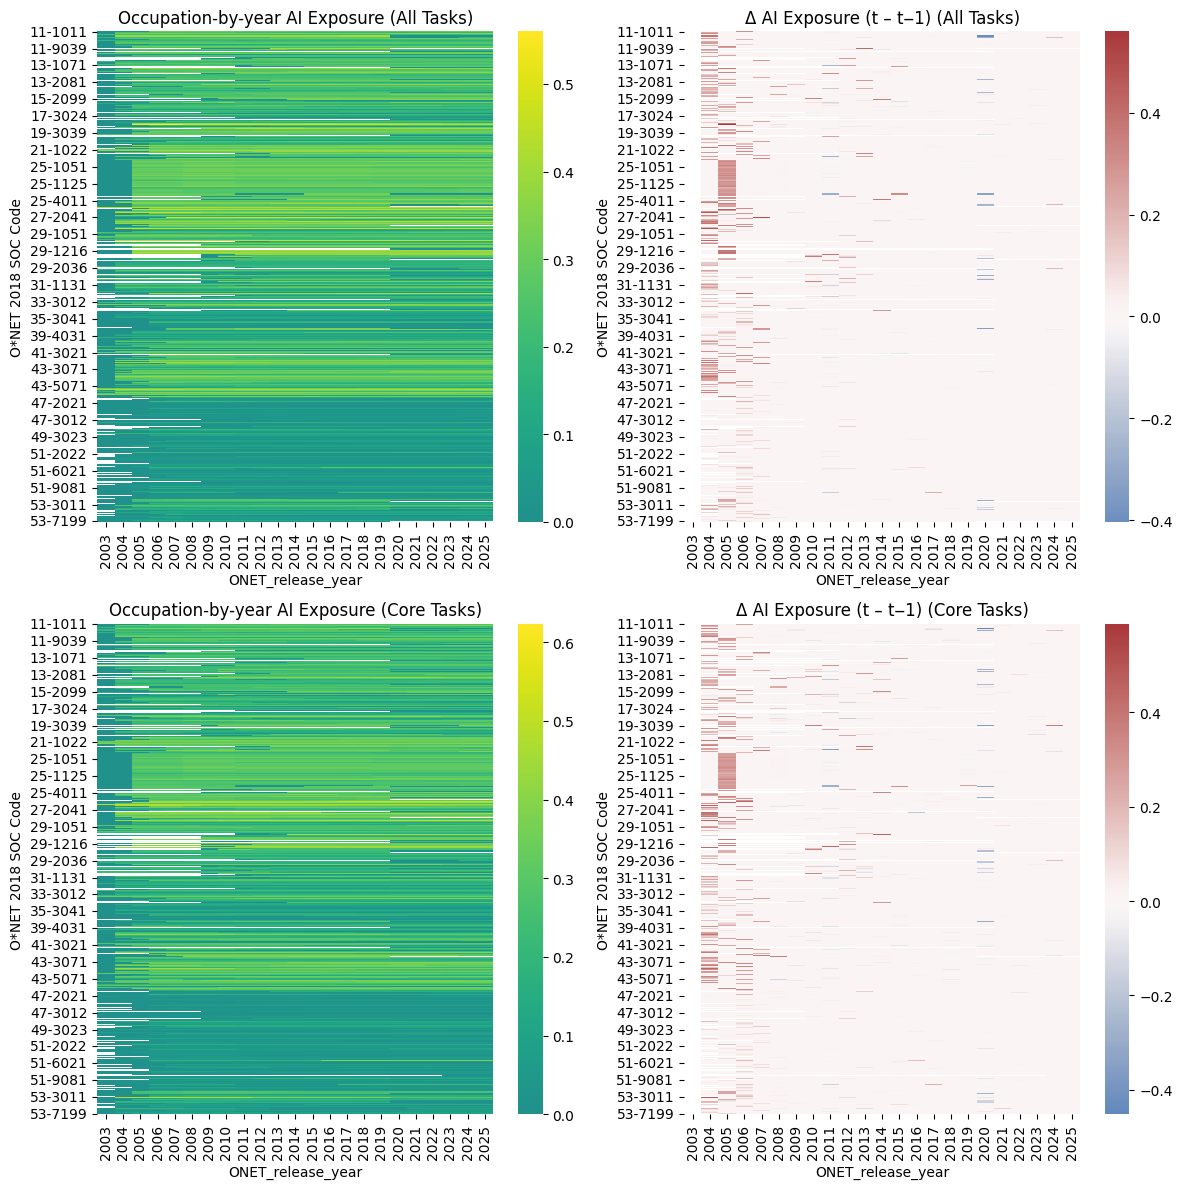

/var/folders/y2/820f0d093ps3xgsy472nf3zc0000gn/T/ipykernel_23843/2640647270.py:94: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pivot_all.fillna(0, inplace=True)  # Fill NaN values with 0


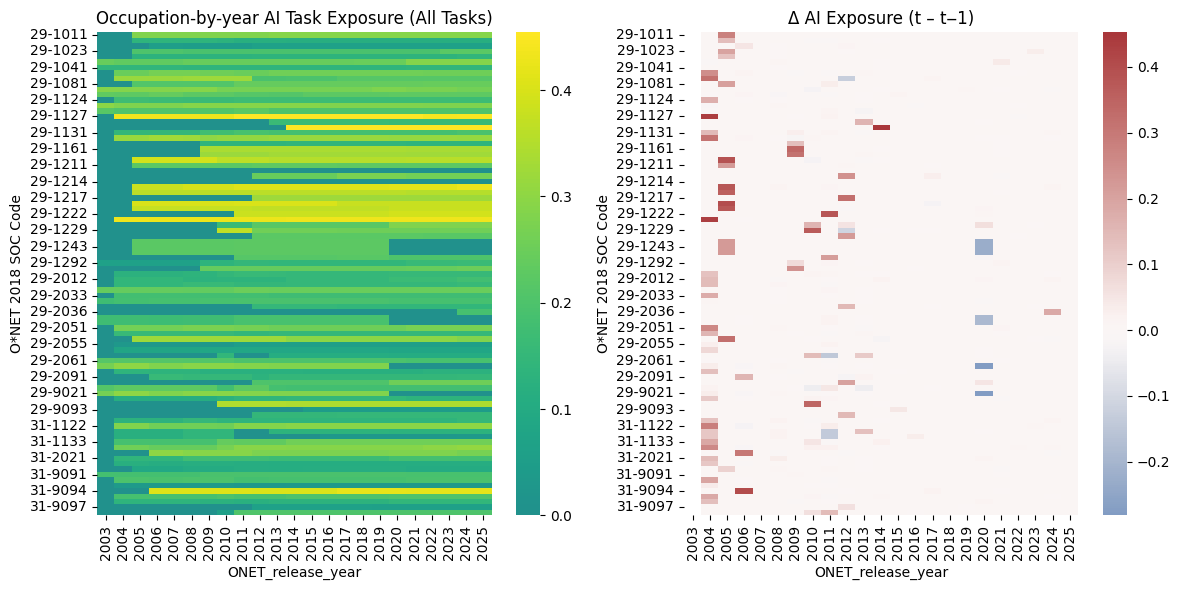

/var/folders/y2/820f0d093ps3xgsy472nf3zc0000gn/T/ipykernel_23843/2640647270.py:115: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pivot_core.fillna(0, inplace=True)  # Fill NaN values with 0


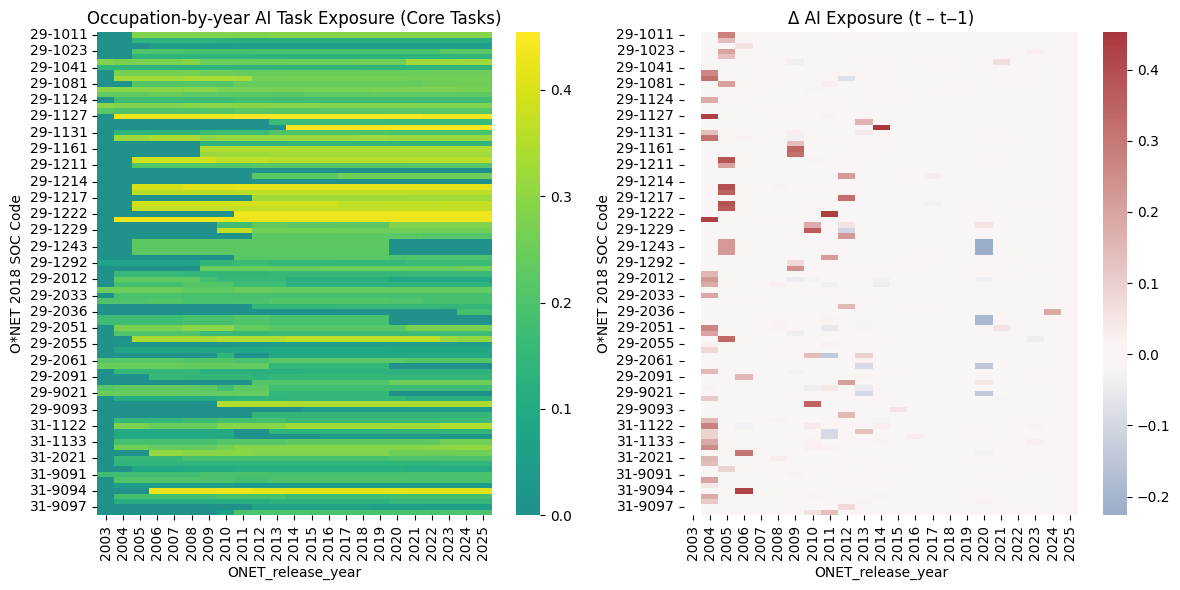

In [191]:
# ------------------------------------------------------------------
# §2  Create weighted-exposure columns for each Felten dimension
# ------------------------------------------------------------------
#  dictionary:  task-flag prefix  →  column holding the (overall OR yearly) slope
felten_dims = {
    'abstract_strategy_games'        : 'Abstract Strategy Games Overall Slope',
    'real_time_video_games'          : 'Real-Time Video Games Overall Slope',
    'image_recognition'              : 'Image Recognition Overall Slope',
    'visual_qa'                      : 'Visual QA Overall Slope',
    'image_generation'               : 'Image Generation Overall Slope',
    'reading_comprehension'          : 'Reading Comprehension Overall Slope',
    'language_modeling'              : 'Language Modeling Overall Slope',
    'translation'                    : 'Translation Overall Slope',
    'speech_recognition'             : 'Speech Recognition Overall Slope',
    'instrumental_track_recognition' : 'Instrumental Track Recognition Overall Slope'
}

for dim, slope_col in felten_dims.items():
    # all tasks
    merged_data[f'weighted_{dim}'] = (
        merged_data[f'{dim}_mode'] *
        merged_data['task_intensity'] *
        merged_data[slope_col]
    )
    # core tasks only
    merged_data[f'weighted_{dim}_core'] = (
        merged_data[f'{dim}_mode'] *
        merged_data['task_intensity_core'] *
        merged_data[slope_col]
    )

# ------------------------------------------------------------------
# §3  Collapse to an occupation-by-year exposure panel
# ------------------------------------------------------------------
collapse_cols = [c for c in merged_data.columns if c.startswith('weighted_')]

occ_year = (
    merged_data
    .groupby(['O*NET 2018 SOC Code', 'ONET_release_year'])[collapse_cols]
    .sum()
    .reset_index()
)

# overall exposure indices (all tasks vs. core tasks)
weight_cols_all  = [c for c in collapse_cols if not c.endswith('_core')]
weight_cols_core = [c for c in collapse_cols if c.endswith('_core')]

occ_year['exposure_all']  = occ_year[weight_cols_all ].sum(axis=1)
occ_year['exposure_core'] = occ_year[weight_cols_core].sum(axis=1)

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Heatmap for cumulative exposure (all tasks)
pivot = occ_year.pivot(index='O*NET 2018 SOC Code',
             columns='ONET_release_year',
             values='exposure_all')
pivot = pivot.apply(pd.to_numeric, errors='coerce')
sns.heatmap(pivot, cmap='viridis', center=0, ax=axes[0, 0])
axes[0, 0].set_title('Occupation-by-year AI Exposure (All Tasks)')

# Heatmap for delta exposure (all tasks)
delta = pivot.diff(axis=1)
sns.heatmap(delta, cmap='vlag', center=0, ax=axes[0, 1])
axes[0, 1].set_title('Δ AI Exposure (t – t‒1) (All Tasks)')

# Heatmap for cumulative exposure (core tasks)
pivot = occ_year.pivot(index='O*NET 2018 SOC Code',
             columns='ONET_release_year',
             values='exposure_core')
pivot = pivot.apply(pd.to_numeric, errors='coerce')
sns.heatmap(pivot, cmap='viridis', center=0, ax=axes[1, 0])
axes[1, 0].set_title('Occupation-by-year AI Exposure (Core Tasks)')

# Heatmap for delta exposure (core tasks)
delta = pivot.diff(axis=1)
sns.heatmap(delta, cmap='vlag', center=0, ax=axes[1, 1])
axes[1, 1].set_title('Δ AI Exposure (t – t‒1) (Core Tasks)')

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('/Users/sidsatya/dev/ailabor/ai_progress_metrics/figs/ai_exposure_figs/occupation_by_year_exposure_overall_2x2.png', dpi=300)
plt.show()

# Filter healthcare-related occupations
occ_year_healthcare = occ_year[
    (occ_year['O*NET 2018 SOC Code'].str.startswith('31')) | 
    (occ_year['O*NET 2018 SOC Code'].str.startswith('29'))
]

# Pivot for cumulative exposure (all tasks)
pivot_all = occ_year_healthcare.pivot(index='O*NET 2018 SOC Code',
                                      columns='ONET_release_year',
                                      values='exposure_all')
pivot_all.fillna(0, inplace=True)  # Fill NaN values with 0
pivot_all = pivot_all.apply(pd.to_numeric, errors='coerce')  # Ensure numeric data
pivot_all.sort_index(inplace=True)

# Calculate year-over-year delta
delta_all = pivot_all.diff(axis=1)

# Plot cumulative and delta exposure (all tasks)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(pivot_all, cmap='viridis', center=0, ax=axes[0])
axes[0].set_title('Occupation-by-year AI Task Exposure (All Tasks)')
sns.heatmap(delta_all, cmap='vlag', center=0, ax=axes[1])
axes[1].set_title('Δ AI Exposure (t – t‒1)')
plt.tight_layout()
plt.savefig('/Users/sidsatya/dev/ailabor/ai_progress_metrics/figs/ai_exposure_figs/healthcare_exposure_all_tasks_overall.png', dpi=300)
plt.show()

# Pivot for cumulative exposure (core tasks)
pivot_core = occ_year_healthcare.pivot(index='O*NET 2018 SOC Code',
                                       columns='ONET_release_year',
                                       values='exposure_core')
pivot_core.fillna(0, inplace=True)  # Fill NaN values with 0
pivot_core = pivot_core.apply(pd.to_numeric, errors='coerce')  # Ensure numeric data
pivot_core.sort_index(inplace=True)

# Calculate year-over-year delta
delta_core = pivot_core.diff(axis=1)

# Plot cumulative and delta exposure (core tasks)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(pivot_core, cmap='viridis', center=0, ax=axes[0])
axes[0].set_title('Occupation-by-year AI Task Exposure (Core Tasks)')
sns.heatmap(delta_core, cmap='vlag', center=0, ax=axes[1])
axes[1].set_title('Δ AI Exposure (t – t‒1)')
plt.tight_layout()
plt.savefig('/Users/sidsatya/dev/ailabor/ai_progress_metrics/figs/ai_exposure_figs/healthcare_exposure_core_tasks_overall.png', dpi=300)
plt.show()



Let $\alpha_{o,d,t}$ be the normalized task intensity for dimension $d$ in occupation $o$ at time $t$. Since tasks can fall under multiple dimensions, $\alpha$'s do not need to sum up to $1$ within an occ-year pair.

\begin{align*}
    \Delta E_{o,t} &=& \sum_d \left [\alpha_{o,d,t}G_{d,t} - \alpha_{o,d,t-1}G_{d,t-1}\right] \\
\end{align*}

Now, we can suppress the occupation and dimension subscripts for ease. Then use the following: 

\begin{align*}
    \alpha_t &=& \alpha_{t-1} + \Delta \alpha_t \\
    G_t &=& G_{t-1} + \Delta G_t\\
    \implies \alpha_t G_t &=& (\alpha_{t-1} + \Delta \alpha_t)(G_{t-1} + \Delta G_t) \\
    &=& \alpha_{t-1}G_{t-1} + \alpha_{t-1}\Delta G_t + G_{t-1}\Delta \alpha_t + \Delta \alpha_t \Delta G_t \\
    \implies \alpha_t G_t - \alpha_{t-1}G_{t-1} &=& \alpha_{t-1}\Delta G_t + G_{t-1}\Delta \alpha_t + \Delta \alpha_t \Delta G_t
\end{align*}

Therefore, 
\begin{align*}
    \Delta E_{o,t} &=& \sum_d \left[\underbrace{\alpha_{t-1}\Delta G_t}_{\text{Frontier Progress}} + \underbrace{G_{t-1}\Delta \alpha_t}_{\text{Task Mix}} + \underbrace{\Delta \alpha_t \Delta G_t}_{\text{Interaction?}} \right]
\end{align*}

1. The task-mix effect is the re-allocation of tasks toward/away from dimension d, holding the existing frontier progress constant. 
2. The frontier effect is the pure impact of new capabilities in AI (as measured by progress on benchmarks) hitting the previously fixed task bundle. 
3. The interaction term are task changes that occur in the same year as the frontier jump. Would expect these to be small but would be interpreted as occupations adjusting to changes in AI instantly.

In [192]:
# ------------------------------------------------------------------
# §1. Construct the panels needed for decomposition
# ------------------------------------------------------------------

# Panel 1: α_{o,d,t} (occupation-dimension-year task intensity)
# Using core tasks. Change 'task_intensity_core' to 'task_intensity' for all tasks.
alpha_components = {}
# felten_dims is defined in a previous cell
for dim in felten_dims.keys():
    alpha_components[dim] = (
        merged_data[f'{dim}_mode'] * merged_data['task_intensity_core']
    )

alpha_df = pd.DataFrame(alpha_components)
alpha_df = pd.concat([merged_data[['O*NET 2018 SOC Code', 'ONET_release_year']], alpha_df], axis=1)

alpha_panel_wide = alpha_df.groupby(['O*NET 2018 SOC Code', 'ONET_release_year']).sum().reset_index()

alpha_panel = pd.melt(
    alpha_panel_wide,
    id_vars=['O*NET 2018 SOC Code', 'ONET_release_year'],
    value_vars=list(felten_dims.keys()),
    var_name='dimension',
    value_name='alpha'
)
alpha_panel = alpha_panel.rename(columns={'O*NET 2018 SOC Code': 'occupation', 'ONET_release_year': 'year'})

# Panel 2: G_{d,t} (cumulative progress) and ΔG_{d,t} (yearly progress)
progress_cols_map = {
    'Abstract Strategy Games': 'abstract_strategy_games',
    'Real-Time Video Games': 'real_time_video_games',
    'Image Recognition': 'image_recognition',
    'Visual QA': 'visual_qa',
    'Image Generation': 'image_generation',
    'Reading Comprehension': 'reading_comprehension',
    'Language Modeling': 'language_modeling',
    'Translation': 'translation',
    'Speech Recognition': 'speech_recognition',
    'Instrumental Track Recognition': 'instrumental_track_recognition'
}

cum_progress_cols = [f'{k} Cum Slope' for k in progress_cols_map.keys()]
yearly_progress_cols = [f'{k} Year Slope' for k in progress_cols_map.keys()]

cum_g = pd.melt(
    year_dim_avg_slopes, id_vars='prog_year', value_vars=cum_progress_cols,
    var_name='dimension', value_name='G_dt'
)
cum_g['dimension'] = cum_g['dimension'].str.replace(' Cum Slope', '').map(progress_cols_map)
cum_g = cum_g.rename(columns={'prog_year': 'year'})

yearly_g = pd.melt(
    year_dim_avg_slopes, id_vars='prog_year', value_vars=yearly_progress_cols,
    var_name='dimension', value_name='dG_dt'
)
yearly_g['dimension'] = yearly_g['dimension'].str.replace(' Year Slope', '').map(progress_cols_map)
yearly_g = yearly_g.rename(columns={'prog_year': 'year'})

progress_panel = pd.merge(cum_g, yearly_g, on=['year', 'dimension'])

# ------------------------------------------------------------------
# §2. Merge panels and create lagged variables
# ------------------------------------------------------------------
merged_decomp = pd.merge(alpha_panel, progress_panel, on=['year', 'dimension'], how='left')

alpha_lagged = alpha_panel.copy()
alpha_lagged['year'] += 1
alpha_lagged = alpha_lagged.rename(columns={'alpha': 'alpha_lag'})
merged_decomp = pd.merge(merged_decomp, alpha_lagged, on=['occupation', 'year', 'dimension'], how='left')

G_lagged = cum_g.copy()
G_lagged['year'] += 1
G_lagged = G_lagged.rename(columns={'G_dt': 'G_dt_lag'})
merged_decomp = pd.merge(merged_decomp, G_lagged, on=['year', 'dimension'], how='left')

merged_decomp.fillna(0, inplace=True)

# ------------------------------------------------------------------
# §3. Calculate decomposition components
# ------------------------------------------------------------------
merged_decomp['d_alpha'] = merged_decomp['alpha'] - merged_decomp['alpha_lag']
merged_decomp['dE_task'] = merged_decomp['G_dt_lag'] * merged_decomp['d_alpha']
merged_decomp['dE_prog'] = merged_decomp['alpha_lag'] * merged_decomp['dG_dt']
merged_decomp['dE_int'] = merged_decomp['d_alpha'] * merged_decomp['dG_dt']

# ------------------------------------------------------------------
# §4. Collapse to occupation-year level
# ------------------------------------------------------------------
decomp = (
    merged_decomp.groupby(['occupation', 'year'])[['dE_task', 'dE_prog', 'dE_int']]
    .sum().reset_index()
)

# ------------------------------------------------------------------
# §5. Verification (optional but recommended)
# ------------------------------------------------------------------
merged_decomp['E'] = merged_decomp['alpha'] * merged_decomp['G_dt']
exposure = merged_decomp.groupby(['occupation', 'year'])['E'].sum().reset_index()
exposure_lagged = exposure.copy()
exposure_lagged['year'] += 1
exposure_lagged = exposure_lagged.rename(columns={'E': 'E_lag'})
exposure = pd.merge(exposure, exposure_lagged, on=['occupation', 'year'], how='left').fillna(0)
exposure['dE_total'] = exposure['E'] - exposure['E_lag']

decomp = pd.merge(decomp, exposure[['occupation', 'year', 'dE_total']], on=['occupation', 'year'])
decomp['dE_sum_components'] = decomp['dE_task'] + decomp['dE_prog'] + decomp['dE_int']

print("Decomposition results (core tasks):")
decomp.head()

Decomposition results (core tasks):


,occupation,year,dE_task,dE_prog,dE_int,dE_total,dE_sum_components
0,11-1011,2003,0.0,0.0,0.0,0.0,0.0
1,11-1011,2004,0.0,0.0,0.0,0.0,0.0
2,11-1011,2005,0.0,0.0,0.0,0.0,0.0
3,11-1011,2006,0.0,0.0,0.0,0.0,0.0
4,11-1011,2007,0.0,0.0,0.0,0.0,0.0


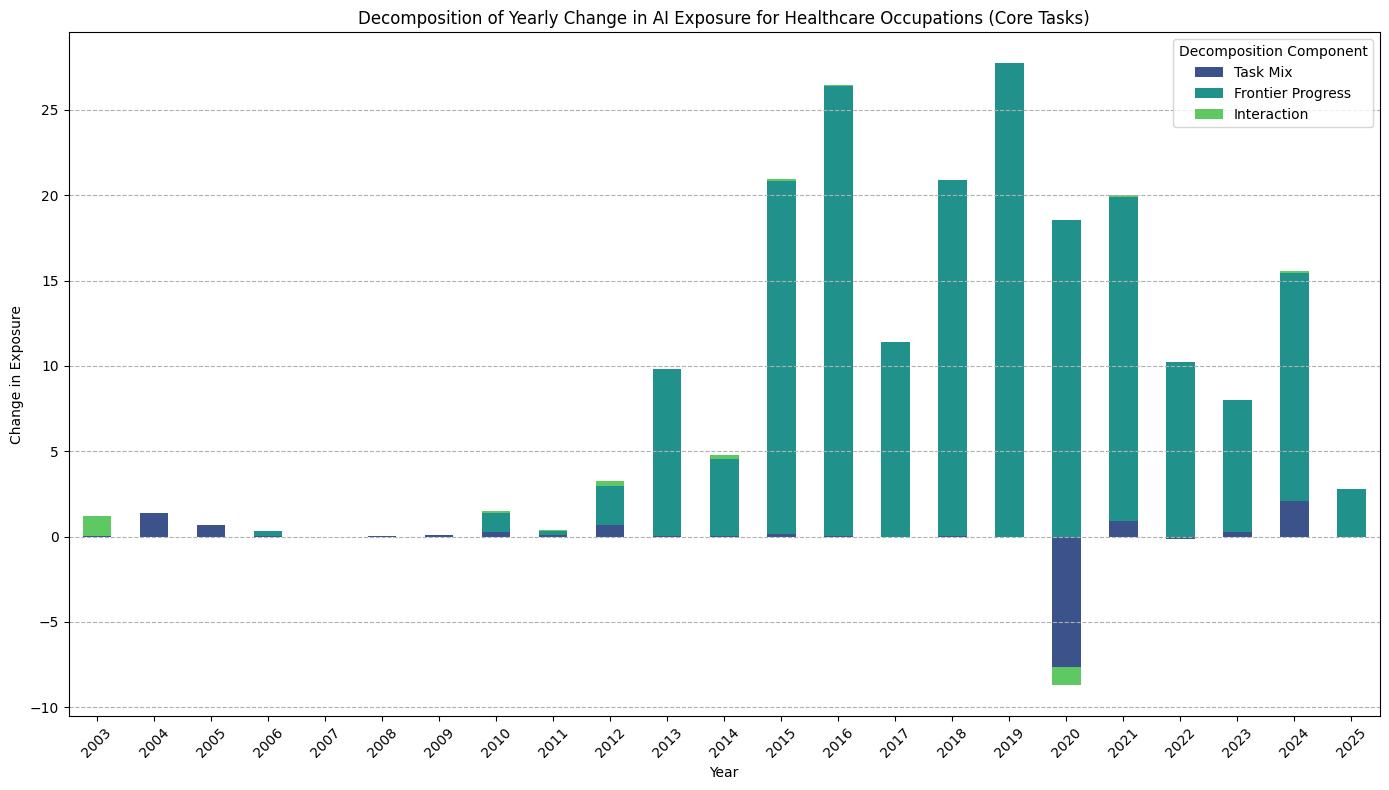

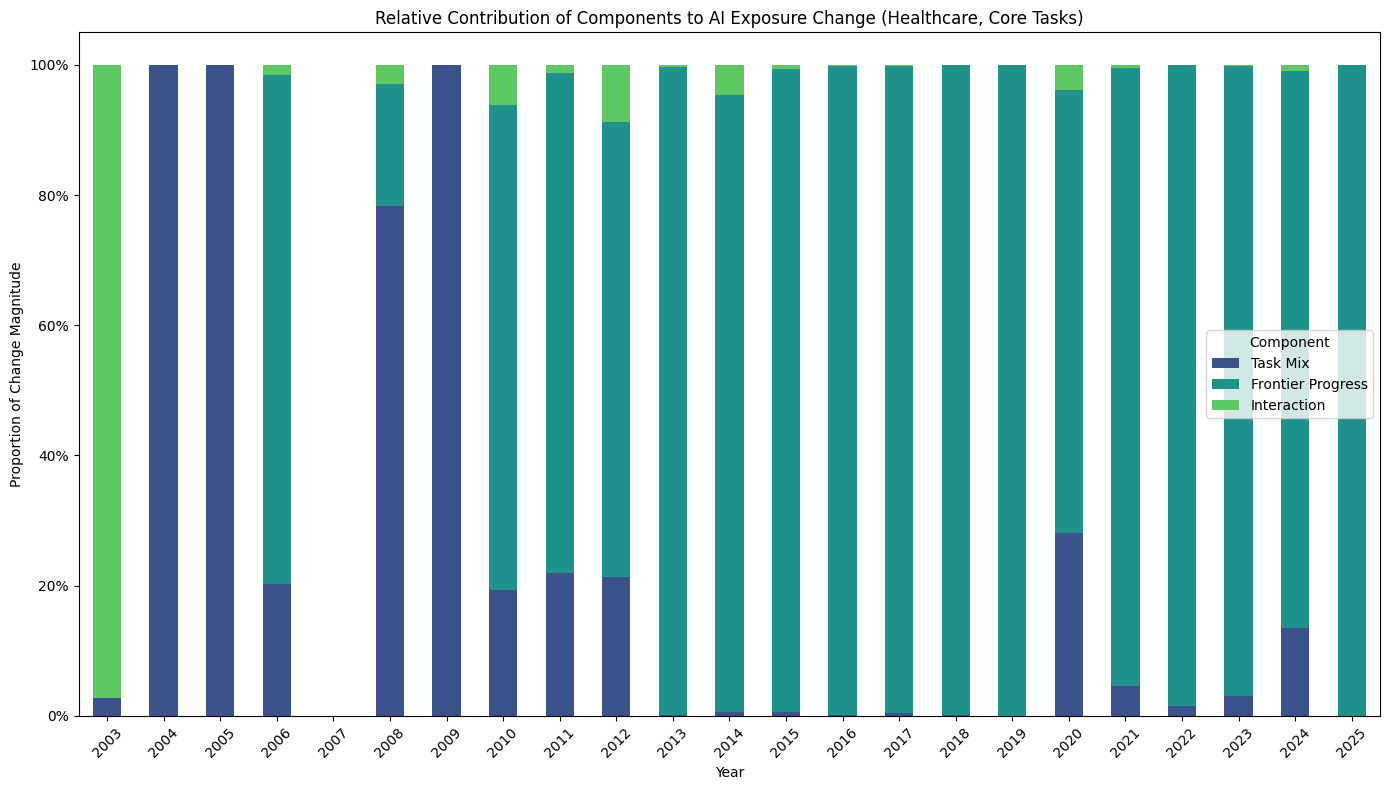

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter

# --- Visualization 1: Absolute contributions over time for core tasks ---
decomp_healthcare = decomp[decomp['occupation'].str.startswith('31') | decomp['occupation'].str.startswith('29')]

# Aggregate the decomposition data by year for all healthcare occupations
decomp_yearly_agg = decomp_healthcare.groupby('year')[['dE_task', 'dE_prog', 'dE_int']].sum()

# Create a stacked bar chart
decomp_yearly_agg.rename(columns={
    'dE_task': 'Task Mix',
    'dE_prog': 'Frontier Progress',
    'dE_int': 'Interaction'
}).plot(kind='bar', stacked=True, figsize=(14, 8), color=sns.color_palette("viridis", 3))

plt.title('Decomposition of Yearly Change in AI Exposure for Healthcare Occupations (Core Tasks)')
plt.xlabel('Year')
plt.ylabel('Change in Exposure')
plt.legend(title='Decomposition Component')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


# --- Visualization 2: Relative contributions over time for core tasks ---

# Calculate proportions of the absolute values of the components
decomp_prop = decomp_yearly_agg.copy()
# To handle negative values and show contribution to magnitude of change, use absolute values
total_abs_change = decomp_prop[['dE_task', 'dE_prog', 'dE_int']].abs().sum(axis=1)
decomp_prop['Task Mix'] = decomp_prop['dE_task'].abs() / total_abs_change
decomp_prop['Frontier Progress'] = decomp_prop['dE_prog'].abs() / total_abs_change
decomp_prop['Interaction'] = decomp_prop['dE_int'].abs() / total_abs_change

# Create a 100% stacked bar chart
decomp_prop[['Task Mix', 'Frontier Progress', 'Interaction']].plot(
    kind='bar', 
    stacked=True, 
    figsize=(14, 8),
    color=sns.color_palette("viridis", 3)
)

plt.title('Relative Contribution of Components to AI Exposure Change (Healthcare, Core Tasks)')
plt.xlabel('Year')
plt.ylabel('Proportion of Change Magnitude')
plt.legend(title='Component')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(FuncFormatter('{:.0%}'.format))
plt.tight_layout()
plt.show()

Now doing the same, but for All Tasks

In [197]:
# ------------------------------------------------------------------
# §1. Construct the panels needed for decomposition
# ------------------------------------------------------------------

# Panel 1: α_{o,d,t} (occupation-dimension-year task intensity)
# Using core tasks. Change 'task_intensity_core' to 'task_intensity' for all tasks.
alpha_components = {}
# felten_dims is defined in a previous cell
for dim in felten_dims.keys():
    alpha_components[dim] = (
        merged_data[f'{dim}_mode'] * merged_data['task_intensity']
    )

alpha_df = pd.DataFrame(alpha_components)
alpha_df = pd.concat([merged_data[['O*NET 2018 SOC Code', 'ONET_release_year']], alpha_df], axis=1)

alpha_panel_wide = alpha_df.groupby(['O*NET 2018 SOC Code', 'ONET_release_year']).sum().reset_index()

alpha_panel = pd.melt(
    alpha_panel_wide,
    id_vars=['O*NET 2018 SOC Code', 'ONET_release_year'],
    value_vars=list(felten_dims.keys()),
    var_name='dimension',
    value_name='alpha'
)
alpha_panel = alpha_panel.rename(columns={'O*NET 2018 SOC Code': 'occupation', 'ONET_release_year': 'year'})

# Panel 2: G_{d,t} (cumulative progress) and ΔG_{d,t} (yearly progress)
progress_cols_map = {
    'Abstract Strategy Games': 'abstract_strategy_games',
    'Real-Time Video Games': 'real_time_video_games',
    'Image Recognition': 'image_recognition',
    'Visual QA': 'visual_qa',
    'Image Generation': 'image_generation',
    'Reading Comprehension': 'reading_comprehension',
    'Language Modeling': 'language_modeling',
    'Translation': 'translation',
    'Speech Recognition': 'speech_recognition',
    'Instrumental Track Recognition': 'instrumental_track_recognition'
}

cum_progress_cols = [f'{k} Cum Slope' for k in progress_cols_map.keys()]
yearly_progress_cols = [f'{k} Year Slope' for k in progress_cols_map.keys()]

cum_g = pd.melt(
    year_dim_avg_slopes, id_vars='prog_year', value_vars=cum_progress_cols,
    var_name='dimension', value_name='G_dt'
)
cum_g['dimension'] = cum_g['dimension'].str.replace(' Cum Slope', '').map(progress_cols_map)
cum_g = cum_g.rename(columns={'prog_year': 'year'})

yearly_g = pd.melt(
    year_dim_avg_slopes, id_vars='prog_year', value_vars=yearly_progress_cols,
    var_name='dimension', value_name='dG_dt'
)
yearly_g['dimension'] = yearly_g['dimension'].str.replace(' Year Slope', '').map(progress_cols_map)
yearly_g = yearly_g.rename(columns={'prog_year': 'year'})

progress_panel = pd.merge(cum_g, yearly_g, on=['year', 'dimension'])

# ------------------------------------------------------------------
# §2. Merge panels and create lagged variables
# ------------------------------------------------------------------
merged_decomp = pd.merge(alpha_panel, progress_panel, on=['year', 'dimension'], how='left')

alpha_lagged = alpha_panel.copy()
alpha_lagged['year'] += 1
alpha_lagged = alpha_lagged.rename(columns={'alpha': 'alpha_lag'})
merged_decomp = pd.merge(merged_decomp, alpha_lagged, on=['occupation', 'year', 'dimension'], how='left')

G_lagged = cum_g.copy()
G_lagged['year'] += 1
G_lagged = G_lagged.rename(columns={'G_dt': 'G_dt_lag'})
merged_decomp = pd.merge(merged_decomp, G_lagged, on=['year', 'dimension'], how='left')

merged_decomp.fillna(0, inplace=True)

# ------------------------------------------------------------------
# §3. Calculate decomposition components
# ------------------------------------------------------------------
merged_decomp['d_alpha'] = merged_decomp['alpha'] - merged_decomp['alpha_lag']
merged_decomp['dE_task'] = merged_decomp['G_dt_lag'] * merged_decomp['d_alpha']
merged_decomp['dE_prog'] = merged_decomp['alpha_lag'] * merged_decomp['dG_dt']
merged_decomp['dE_int'] = merged_decomp['d_alpha'] * merged_decomp['dG_dt']

# ------------------------------------------------------------------
# §4. Collapse to occupation-year level
# ------------------------------------------------------------------
decomp = (
    merged_decomp.groupby(['occupation', 'year'])[['dE_task', 'dE_prog', 'dE_int']]
    .sum().reset_index()
)

# ------------------------------------------------------------------
# §5. Verification (optional but recommended)
# ------------------------------------------------------------------
merged_decomp['E'] = merged_decomp['alpha'] * merged_decomp['G_dt']
exposure = merged_decomp.groupby(['occupation', 'year'])['E'].sum().reset_index()
exposure_lagged = exposure.copy()
exposure_lagged['year'] += 1
exposure_lagged = exposure_lagged.rename(columns={'E': 'E_lag'})
exposure = pd.merge(exposure, exposure_lagged, on=['occupation', 'year'], how='left').fillna(0)
exposure['dE_total'] = exposure['E'] - exposure['E_lag']

decomp = pd.merge(decomp, exposure[['occupation', 'year', 'dE_total']], on=['occupation', 'year'])
decomp['dE_sum_components'] = decomp['dE_task'] + decomp['dE_prog'] + decomp['dE_int']

print("Decomposition results (all tasks):")
decomp.head()

Decomposition results (all tasks):


,occupation,year,dE_task,dE_prog,dE_int,dE_total,dE_sum_components
0,11-1011,2003,0.0,0.0,0.0,0.0,0.0
1,11-1011,2004,0.0,0.0,0.0,0.0,0.0
2,11-1011,2005,0.0,0.0,0.0,0.0,0.0
3,11-1011,2006,0.0,0.0,0.0,0.0,0.0
4,11-1011,2007,0.0,0.0,0.0,0.0,0.0


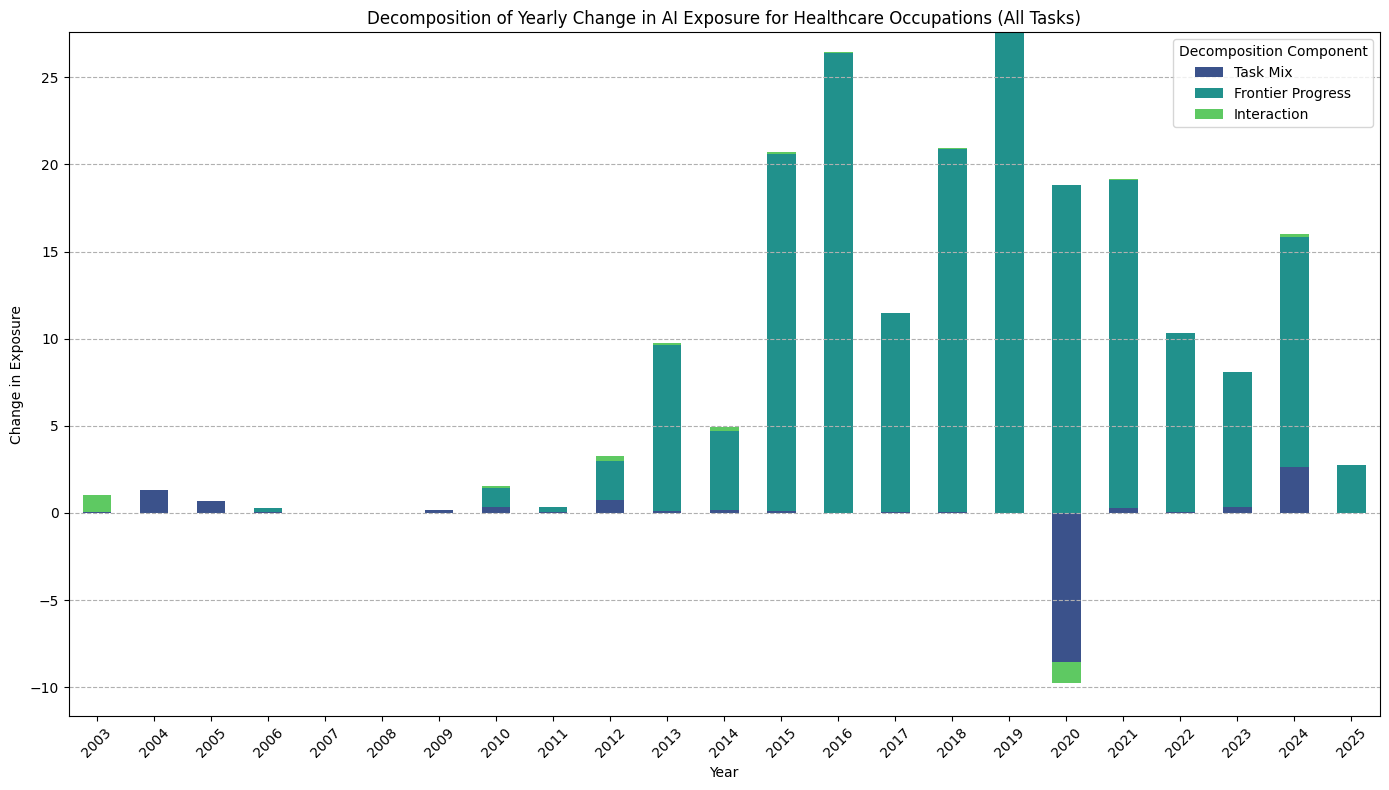

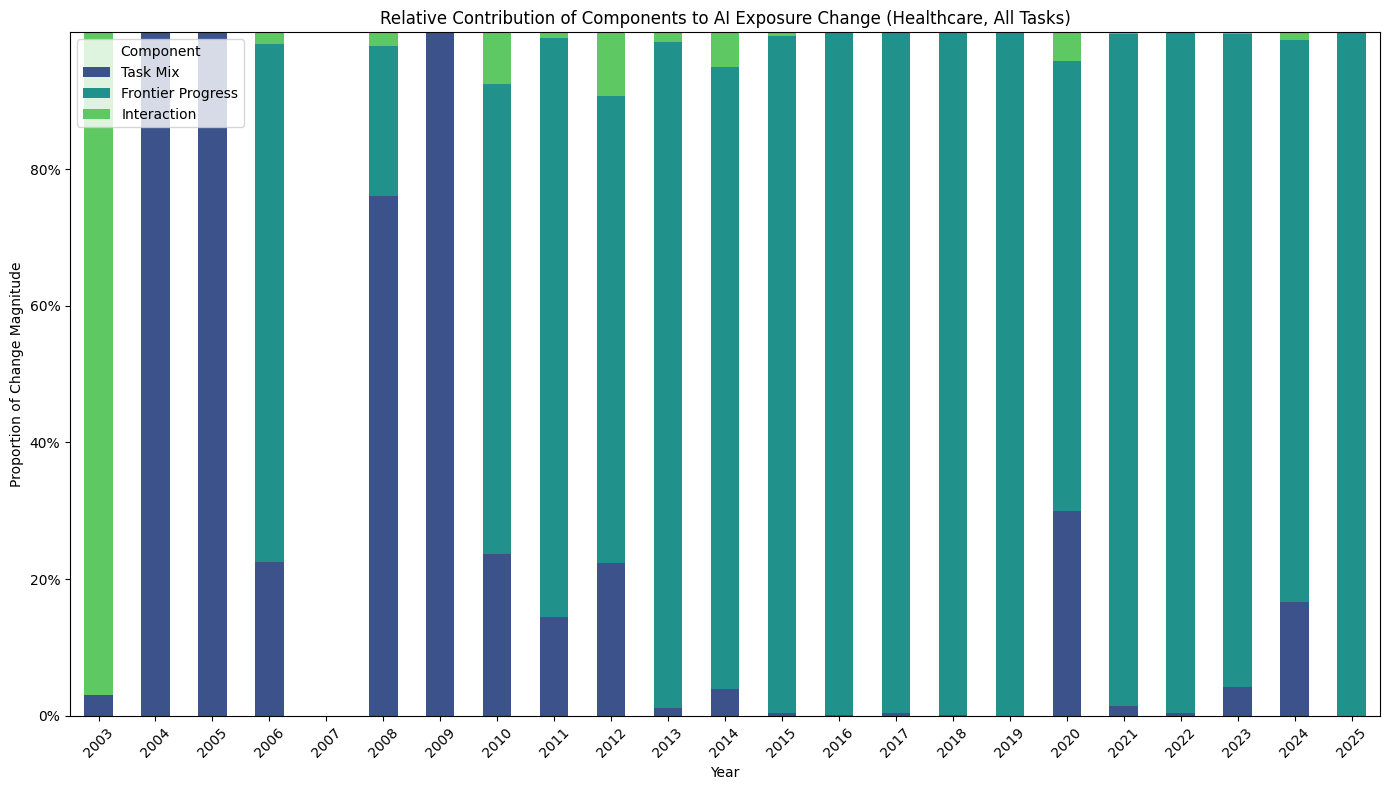

In [198]:
# --- Visualization 3: Absolute contributions over time for all tasks ---
decomp_healthcare = decomp[decomp['occupation'].str.startswith('31') | decomp['occupation'].str.startswith('29')]

# Aggregate the decomposition data by year for all healthcare occupations
decomp_yearly_agg = decomp_healthcare.groupby('year')[['dE_task', 'dE_prog', 'dE_int']].sum()

# Create a stacked bar chart
decomp_yearly_agg.rename(columns={
    'dE_task': 'Task Mix',
    'dE_prog': 'Frontier Progress',
    'dE_int': 'Interaction'
}).plot(kind='bar', stacked=True, figsize=(14, 8), color=sns.color_palette("viridis", 3))

plt.title('Decomposition of Yearly Change in AI Exposure for Healthcare Occupations (All Tasks)')
plt.xlabel('Year')
plt.ylabel('Change in Exposure')
plt.legend(title='Decomposition Component')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


# --- Visualization 4: Relative contributions over time for all tasks ---

# Calculate proportions of the absolute values of the components
decomp_prop = decomp_yearly_agg.copy()
# To handle negative values and show contribution to magnitude of change, use absolute values
total_abs_change = decomp_prop[['dE_task', 'dE_prog', 'dE_int']].abs().sum(axis=1)
decomp_prop['Task Mix'] = decomp_prop['dE_task'].abs() / total_abs_change
decomp_prop['Frontier Progress'] = decomp_prop['dE_prog'].abs() / total_abs_change
decomp_prop['Interaction'] = decomp_prop['dE_int'].abs() / total_abs_change

# Create a 100% stacked bar chart
decomp_prop[['Task Mix', 'Frontier Progress', 'Interaction']].plot(
    kind='bar', 
    stacked=True, 
    figsize=(14, 8),
    color=sns.color_palette("viridis", 3)
)

plt.title('Relative Contribution of Components to AI Exposure Change (Healthcare, All Tasks)')
plt.xlabel('Year')
plt.ylabel('Proportion of Change Magnitude')
plt.legend(title='Component')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(FuncFormatter('{:.0%}'.format))
plt.tight_layout()
plt.show()

In [199]:
yearly_g

,year,dimension,dG_dt
0,1985,abstract_strategy_games,0.113482
1,1986,abstract_strategy_games,0.000000
2,1987,abstract_strategy_games,0.051211
3,1988,abstract_strategy_games,0.035755
4,1989,abstract_strategy_games,0.016916
...,...,...,...
405,2021,instrumental_track_recognition,0.128363
406,2022,instrumental_track_recognition,0.177987
407,2023,instrumental_track_recognition,0.132435
408,2024,instrumental_track_recognition,0.000000


In [200]:
culprit = yearly_g.query("year==2006").groupby('dimension')['dG_dt'].sum()
print(culprit.sort_values(ascending=False).head())

dimension
abstract_strategy_games           0.064472
image_recognition                 0.025318
image_generation                  0.000000
instrumental_track_recognition    0.000000
language_modeling                 0.000000
Name: dG_dt, dtype: float64


## Get the Top 5 and Bottom 5 Exposed Occupations in 2023

In [228]:
# ------------------------------------------------------------------
# §1. Get cumulative AI progress for 2023
# ------------------------------------------------------------------

# Get the cumulative slopes from 2023
latest_cum_slopes = year_dim_avg_slopes[year_dim_avg_slopes['prog_year'] == 2023].iloc[0]

# Create a reverse map from short to long dimension names for convenience
dim_map_short_to_long = {v: k for k, v in progress_cols_map.items()}

# Store 2023 cumulative slopes in a dictionary
cum_slopes_2023 = {}
for dim_short in felten_dims.keys():
    dim_long = dim_map_short_to_long[dim_short]
    cum_slope_2023_col = f'{dim_long} Cum Slope'
    cum_slopes_2023[dim_short] = latest_cum_slopes[cum_slope_2023_col]

# ------------------------------------------------------------------
# §2. Get task intensities (alpha) for 2023
# ------------------------------------------------------------------

# Filter for 2023 data
tasks_2023_df = merged_data[merged_data['ONET_release_year'] == 2023].copy()

# Drop any occupations that have any task with a NaN Mean importance or mean frequency value in any task
tasks_with_nan = tasks_2023_df[(tasks_2023_df['Mean Importance'].isna()) | (tasks_2023_df['Mean Frequency'].isna())]['O*NET 2018 SOC Code'].unique()
tasks_2023_df = tasks_2023_df[~tasks_2023_df['O*NET 2018 SOC Code'].isin(tasks_with_nan)]

# Calculate alpha for each dimension (using core tasks)
for dim_short in felten_dims.keys():
    tasks_2023_df[f'alpha_{dim_short}'] = (
        tasks_2023_df[f'{dim_short}_mode'] * tasks_2023_df['task_intensity_core']
    )

# ------------------------------------------------------------------
# §3. Calculate 2023 exposure
# ------------------------------------------------------------------

# Calculate weighted exposure for each dimension
for dim_short in felten_dims.keys():
    tasks_2023_df[f'exposure_2023_{dim_short}'] = (
        tasks_2023_df[f'alpha_{dim_short}'] * cum_slopes_2023[dim_short]
    )

# Sum across dimensions to get total exposure per task
exposure_cols_2023 = [f'exposure_2023_{dim}' for dim in felten_dims.keys()]
tasks_2023_df['total_exposure_2023'] = tasks_2023_df[exposure_cols_2023].sum(axis=1)

# Collapse to occupation level
occ_exposure_2023 = (
    tasks_2023_df
    .groupby(['O*NET 2018 SOC Code'])['total_exposure_2023']
    .sum()
    .reset_index()
    .sort_values('total_exposure_2023', ascending=False)
)

# ------------------------------------------------------------------
# §4. Display results
# ------------------------------------------------------------------

print("--- Top 5 Most Exposed Occupations in 2023 (Core Tasks) ---")
print(occ_exposure_2023.head(5).to_string())

print("\n--- Top 5 Least Exposed Occupations in 2023 (Core Tasks) ---")
print(occ_exposure_2023.tail(5).to_string())

--- Top 5 Most Exposed Occupations in 2023 (Core Tasks) ---
    O*NET 2018 SOC Code  total_exposure_2023
180             27-1014             4.733806
86              19-1042             4.646939
183             27-1024             4.612380
178             27-1011             4.549293
197             27-4032             4.530962

--- Top 5 Least Exposed Occupations in 2023 (Core Tasks) ---
    O*NET 2018 SOC Code  total_exposure_2023
408             47-3015                  0.0
388             47-2051                  0.0
389             47-2053                  0.0
495             51-9197                  0.0
437             49-9091                  0.0


In [229]:
for idx, row in merged_data[(merged_data['ONET_release_year'] == 2023) & (merged_data['O*NET 2018 SOC Code'] == '47-3015')].iloc[:, 11:50].iterrows(): 
    print(row['Task_y'])
    print("Abstract Games: ", row['abstract_strategy_games_mode'])
    print("Video Games: ",row['real_time_video_games_mode'])
    print("Image Recognition: ", row['image_recognition_mode'])
    print("Visual QA: ",row['visual_qa_mode'])
    print("Image generation: ",row['image_generation_mode'])
    print("Reading comprehension: ",row['reading_comprehension_mode'])
    print("Language Modeling: ",row['language_modeling_mode'])
    print("Translation: ",row['translation_mode'])
    print("Speech recog: ",row['speech_recognition_mode'])
    print("Track recog: ",row['instrumental_track_recognition_mode'])
    print("Task intensity: ",row['task_intensity'])
    print("#"*50)
    print("\n")

measure cut thread and assemble new pipe placing the assembled pipe in hangers or other supports
Abstract Games:  0.0
Video Games:  0.0
Image Recognition:  0.0
Visual QA:  0.0
Image generation:  0.0
Reading comprehension:  0.0
Language Modeling:  0.0
Translation:  0.0
Speech recog:  0.0
Track recog:  0.0
Task intensity:  0.0849686917487273
##################################################


cut or drill holes in walls or floors to accommodate the passage of pipes
Abstract Games:  0.0
Video Games:  0.0
Image Recognition:  0.0
Visual QA:  0.0
Image generation:  0.0
Reading comprehension:  0.0
Language Modeling:  0.0
Translation:  0.0
Speech recog:  0.0
Track recog:  0.0
Task intensity:  0.0827358998567586
##################################################


perform roughins repair and replace fixtures and water heaters and locate repair or remove leaking or broken pipes
Abstract Games:  0.0
Video Games:  0.0
Image Recognition:  0.0
Visual QA:  0.0
Image generation:  0.0
Reading comprehe

Most exposed: 
1. 27-1014 -- Special Effects Artists and Animators
2. 19-1042 -- Medical Scientists, Except Epidemiologists
3. 27-1024 -- Graphic Designers
4. 27-1011 -- Art Directors
5. 27-4032 -- Film and Video Editors

Least Exposed
1. 47-3015 -- Helpers--Pipelayers, Plumbers, Pipefitters, and Steamfitters
2. 47-2051 -- Cement Masons and Concrete Finishers

### Reservations about this approach

This projection is based on several strong assumptions and should be interpreted with caution:

1.  **Linear Progress Projection**: We assume that AI progress will continue from 2024-2025 at the same average rate as it has over the entire historical period (`overall_slope`). AI progress is notoriously non-linear and can be characterized by sudden breakthroughs, so this is a significant simplification.

2.  **Static Task Composition**: The calculation uses the most recent O*NET data (from 2023) to define the task composition of occupations. It assumes that the tasks performed within an occupation (`alpha_o,d`) will not change between 2023 and 2025. In reality, jobs evolve, and the set of tasks often changes in response to new technologies. This approach ignores the "Task Mix" and "Interaction" effects for the projection period.

3.  **Data Granularity and Lags**: The O*NET data is updated periodically and may not capture the very latest changes in the labor market. Similarly, the AI benchmark data may not perfectly represent the full spectrum of economically relevant AI capabilities.

## Get Top 5 and Bottom 5 Exposed Occupations in Healthcare in 2023

In [230]:
# ------------------------------------------------------------------
# §1. Get cumulative AI progress for 2023
# ------------------------------------------------------------------

# Get the cumulative slopes from 2023
latest_cum_slopes = year_dim_avg_slopes[year_dim_avg_slopes['prog_year'] == 2023].iloc[0]

# Create a reverse map from short to long dimension names for convenience
dim_map_short_to_long = {v: k for k, v in progress_cols_map.items()}

# Store 2023 cumulative slopes in a dictionary
cum_slopes_2023 = {}
for dim_short in felten_dims.keys():
    dim_long = dim_map_short_to_long[dim_short]
    cum_slope_2023_col = f'{dim_long} Cum Slope'
    cum_slopes_2023[dim_short] = latest_cum_slopes[cum_slope_2023_col]

# ------------------------------------------------------------------
# §2. Get task intensities (alpha) for 2023
# ------------------------------------------------------------------

# Filter for 2023 data
tasks_2023_df_healthcare = merged_data[(merged_data['ONET_release_year'] == 2023) & ((merged_data['O*NET 2018 SOC Code'].str.startswith('29')) | (merged_data['O*NET 2018 SOC Code'].str.startswith('31')))].copy()

# Drop any occupations that have any task with a NaN Mean importance or mean frequency value in any task
occs_with_nan = tasks_2023_df_healthcare[(tasks_2023_df_healthcare['Mean Importance'].isna()) | (tasks_2023_df_healthcare['Mean Frequency'].isna())]['O*NET 2018 SOC Code'].unique()
tasks_2023_df_healthcare = tasks_2023_df_healthcare[~tasks_2023_df_healthcare['O*NET 2018 SOC Code'].isin(occs_with_nan)]


# Calculate alpha for each dimension (using core tasks)
for dim_short in felten_dims.keys():
    tasks_2023_df_healthcare[f'alpha_{dim_short}'] = (
        tasks_2023_df_healthcare[f'{dim_short}_mode'] * tasks_2023_df_healthcare['task_intensity_core']
    )

# ------------------------------------------------------------------
# §3. Calculate 2023 exposure
# ------------------------------------------------------------------

# Calculate weighted exposure for each dimension
for dim_short in felten_dims.keys():
    tasks_2023_df_healthcare[f'exposure_2023_{dim_short}'] = (
        tasks_2023_df_healthcare[f'alpha_{dim_short}'] * cum_slopes_2023[dim_short]
    )

# Sum across dimensions to get total exposure per task
exposure_cols_2023 = [f'exposure_2023_{dim}' for dim in felten_dims.keys()]
tasks_2023_df_healthcare['total_exposure_2023'] = tasks_2023_df_healthcare[exposure_cols_2023].sum(axis=1)

# Collapse to occupation level
occ_exposure_2023_healthcare = (
    tasks_2023_df_healthcare
    .groupby(['O*NET 2018 SOC Code'])['total_exposure_2023']
    .sum()
    .reset_index()
    .sort_values('total_exposure_2023', ascending=False)
)

# ------------------------------------------------------------------
# §4. Display results
# ------------------------------------------------------------------

print("--- Top 5 Most Exposed Occupations in 2023 (Core Tasks) ---")
print(occ_exposure_2023_healthcare.head(5).to_string())

print("\n--- Top 5 Least Exposed Occupations in 2023 (Core Tasks) ---")
print(occ_exposure_2023_healthcare.tail(5).to_string())

--- Top 5 Most Exposed Occupations in 2023 (Core Tasks) ---
   O*NET 2018 SOC Code  total_exposure_2023
30             29-1222             4.372264
16             29-1129             4.267189
25             29-1215             4.111218
14             29-1127             4.099956
31             29-1223             4.083145

--- Top 5 Least Exposed Occupations in 2023 (Core Tasks) ---
   O*NET 2018 SOC Code  total_exposure_2023
44             29-2055             0.558970
2              29-1022             0.542332
54             29-9093             0.518626
68             31-9093             0.435990
59             31-1132             0.306886


Most exposed: 
1. 29-1222 - Physicians, Pathologists
2. 29-1129 - Therapists, All Other
3. 29-1215 - Family Medicine Physicians
4. 29-1127 - Speech-Language Pathologists
5. 29-1223 - Psychiatrists

Least Exposed
1. 29-2055 - Surgical Technologists
2. 29-1022 - Oral and Maxillofacial Surgeons
3. 29-9093 - Surgical Assistants 
4. 31-9093 - Medical Equipment Preparers
5. 31-1132 - Orderlies

In [220]:
merged_data[(merged_data['ONET_release_year'] == 2023) & (merged_data['O*NET 2018 SOC Code'] == '29-1223')].iloc[:, 11:50].columns

Index(['task_clean', 'canon_id', 'year_x', 'Mean Importance',
       'Importance Normalized All', 'Mean Frequency', 'normalized_importance',
       'normalized_importance_core', 'normalized_frequency',
       'normalized_frequency_core', 'task_intensity', 'task_intensity_core',
       'first_seen', 'last_seen', 'Task_y', 'abstract_strategy_games_mean',
       'abstract_strategy_games_mode', 'real_time_video_games_mean',
       'real_time_video_games_mode', 'image_recognition_mean',
       'image_recognition_mode', 'visual_qa_mean', 'visual_qa_mode',
       'image_generation_mean', 'image_generation_mode',
       'reading_comprehension_mean', 'reading_comprehension_mode',
       'language_modeling_mean', 'language_modeling_mode', 'translation_mean',
       'translation_mode', 'speech_recognition_mean',
       'speech_recognition_mode', 'instrumental_track_recognition_mean',
       'instrumental_track_recognition_mode', 'year_y',
       'Image Recognition Year Slope', 'Speech Recognition

In [224]:
for idx, row in merged_data[(merged_data['ONET_release_year'] == 2023) & (merged_data['O*NET 2018 SOC Code'] == '29-1223')].iloc[:, 11:50].iterrows(): 
    print(row['Task_y'])
    print("Abstract Games: ", row['abstract_strategy_games_mode'])
    print("Video Games: ",row['real_time_video_games_mode'])
    print("Image Recognition: ", row['image_recognition_mode'])
    print("Visual QA: ",row['visual_qa_mode'])
    print("Image generation: ",row['image_generation_mode'])
    print("Reading comprehension: ",row['reading_comprehension_mode'])
    print("Language Modeling: ",row['language_modeling_mode'])
    print("Translation: ",row['translation_mode'])
    print("Speech recog: ",row['speech_recognition_mode'])
    print("Track recog: ",row['instrumental_track_recognition_mode'])
    print("Task intensity: ",row['task_intensity'])
    print("#"*50)
    print("\n")

prescribe direct or administer psychotherapeutic treatments or medications to treat mental emotional or behavioral disorders
Abstract Games:  0.0
Video Games:  0.0
Image Recognition:  0.0
Visual QA:  0.0
Image generation:  0.0
Reading comprehension:  1.0
Language Modeling:  1.0
Translation:  1.0
Speech recog:  1.0
Track recog:  0.0
Task intensity:  0.1300160718601239
##################################################


gather and maintain patient information and records including social or medical history obtained from patients relatives or other professionals
Abstract Games:  0.0
Video Games:  0.0
Image Recognition:  1.0
Visual QA:  0.0
Image generation:  0.0
Reading comprehension:  1.0
Language Modeling:  1.0
Translation:  1.0
Speech recog:  1.0
Track recog:  0.0
Task intensity:  0.1107314614245568
##################################################


design individualized care plans using a variety of treatments
Abstract Games:  0.0
Video Games:  0.0
Image Recognition:  0.0
Visual QA